#### First time deploying DQN agent on FID 20
- Comparison between DQN and PPO
- Comparison between normal and sqrt-transformed reward

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

from carps.analysis.gather_data import normalize_logs, get_interpolated_performance_df

In [2]:
def load_set(paths: list[str], set_id: str = "unknown") -> tuple[pd.DataFrame, pd.DataFrame]:
    logs = []
    for p in paths:
        fn = Path(p) / "trajectory.parquet"
        if not fn.is_file():
            fn = Path(p) / "runs/logs.csv"
        logs.append(pd.read_csv(fn))

    df = pd.concat(logs).reset_index(drop=True)
    df_cfg = pd.concat([pd.read_csv(Path(p) / "runs/logs_cfg.csv") for p in paths]).reset_index(drop=True)
    df["set"] = set_id
    return df, df_cfg

In [3]:
PATH = '/scratch/hpc-prf-intexml/tklenke/experiment_runs/dacboenv_fid20'
NAME = 'dacboenv'

In [4]:
def create_df():
    run_dirs = [(PATH, NAME)]
    dfs = [load_set(paths=[ps], set_id=set_id) for ps, set_id in run_dirs]

    df = pd.concat([d for d, _ in dfs]).reset_index(drop=True)
    df = normalize_logs(df)

    perf = get_interpolated_performance_df(df)

    perf_time = get_interpolated_performance_df(df, x_column="time_norm")

    perf.to_parquet(f'{PATH}/perf.parquet')
    perf_time.to_parquet(f'{PATH}/perf_time.parquet')

In [5]:
create_df()

[08:19:27] INFO     Start normalization...                                                       ]8;id=654651;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=397814;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py#602\602]8;;\

           INFO     Normalize n_trials...                                                        ]8;id=741988;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=893901;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py#603\603]8;;\

           INFO     Normalize cost...                                                            ]8;id=101280;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=474949;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py#605\605]8;;\

           INFO     Calc normalized incumbent cost...                                            ]8;id=104571;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=462518;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py#621\621]8;;\

           INFO     Normalize time...                                                            ]8;id=343520;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=642100;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py#641\641]8;;\

           INFO     Done.                                                                        ]8;id=255684;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=971212;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py#644\644]8;;\

           INFO     Create dataframe for neat plotting by aligning x-axis / interpolating        ]8;id=878035;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=565154;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py#718\718]8;;\
                    budget.                                                                                        

           INFO     Create dataframe for neat plotting by aligning x-axis / interpolating        ]8;id=672791;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=427360;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py#718\718]8;;\
                    budget.                                                                                        

In [6]:
# Data loading
df = pd.read_parquet(f'{PATH}/perf.parquet')

In [7]:
final = pd.DataFrame(columns=['optimizer_id', 'task_id', 'incumbent_value', 'seed'])

for problem in df['task_id'].unique():
    filtered = df[df['task_id'] == problem]

    incumbents = filtered.groupby(["optimizer_id", "seed"])["trial_value__cost_inc_norm"].min().reset_index()
    incumbents.columns = ['optimizer_id', 'seed', 'incumbent_value']
    incumbents['task_id'] = problem

    final = pd.concat([final, incumbents], ignore_index=True)

final.to_csv(f'{PATH}/final.csv')

/tmp/ipykernel_2714350/2516198194.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final = pd.concat([final, incumbents], ignore_index=True)


In [8]:
final = pd.read_csv(f'{PATH}/final.csv')

In [9]:
FIGURE_PATH = '../figures'

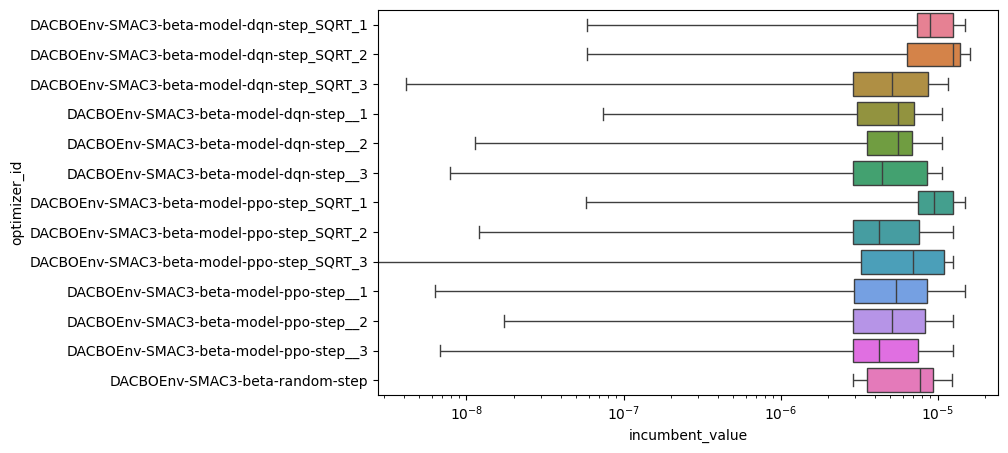

In [9]:
# Model Big: Trained on 1.5M env steps with full ParEGO Reward on big search space 10 ^ (-10, 6)
# Model Smaller: Trained on ~700K env steps with full ParEGO Reward on smaller search space 10 ^ (-5, 4)
# Model Single: Trained on ~400K env steps with single reward (trajectory AUC) on smaller search space 10 ^ (-5, 4)

plt.figure(figsize=(8, 5))
sns.boxplot(data=final, x='incumbent_value', y='optimizer_id', hue='optimizer_id')
plt.xscale('log')
#plt.savefig(f'{FIGURE_PATH}/ppodqn/1.pdf', bbox_inches='tight')

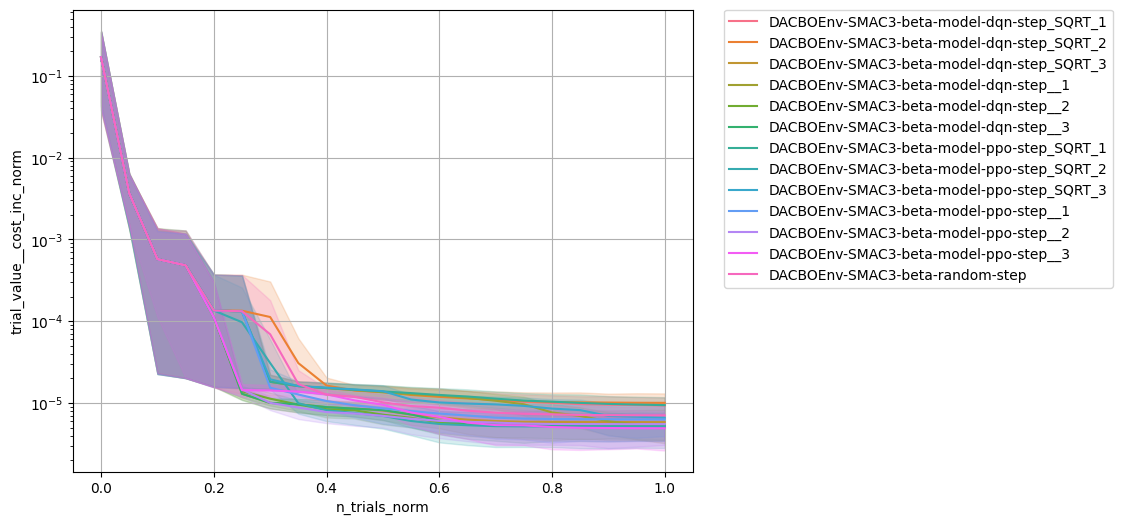

In [10]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="n_trials_norm", y="trial_value__cost_inc_norm", hue="optimizer_id")
plt.yscale("log")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.savefig(f'{FIGURE_PATH}/ppodqn/2.pdf', bbox_inches='tight')

In [12]:
# Read logs and create df

dacboenv_jsons = list(Path(PATH).rglob("DACBOEnvActions.jsonl"))
json_dfs = []

for j in dacboenv_jsons:

    tmp = pd.read_json(j, lines=True)
    tmp["source"] = j

    json_dfs.append(tmp)

dacboenv_df = pd.concat(json_dfs, ignore_index=True)

# Extract metadata from path

dacboenv_df["optimizer"] = dacboenv_df["source"].apply(lambda x: x.parts[7])
dacboenv_df["seed"] = dacboenv_df["source"].apply(lambda x: x.parts[-2])
dacboenv_df["task"] = dacboenv_df["source"].apply(lambda x: f"bbob/2/{x.parts[-4]}")

dacboenv_df.to_csv(f"{PATH}/dacboenv_actions_json.csv")

In [13]:
dacboenv_df["n_trials_norm"] = dacboenv_df["n_trials"] / dacboenv_df["n_trials"].max()

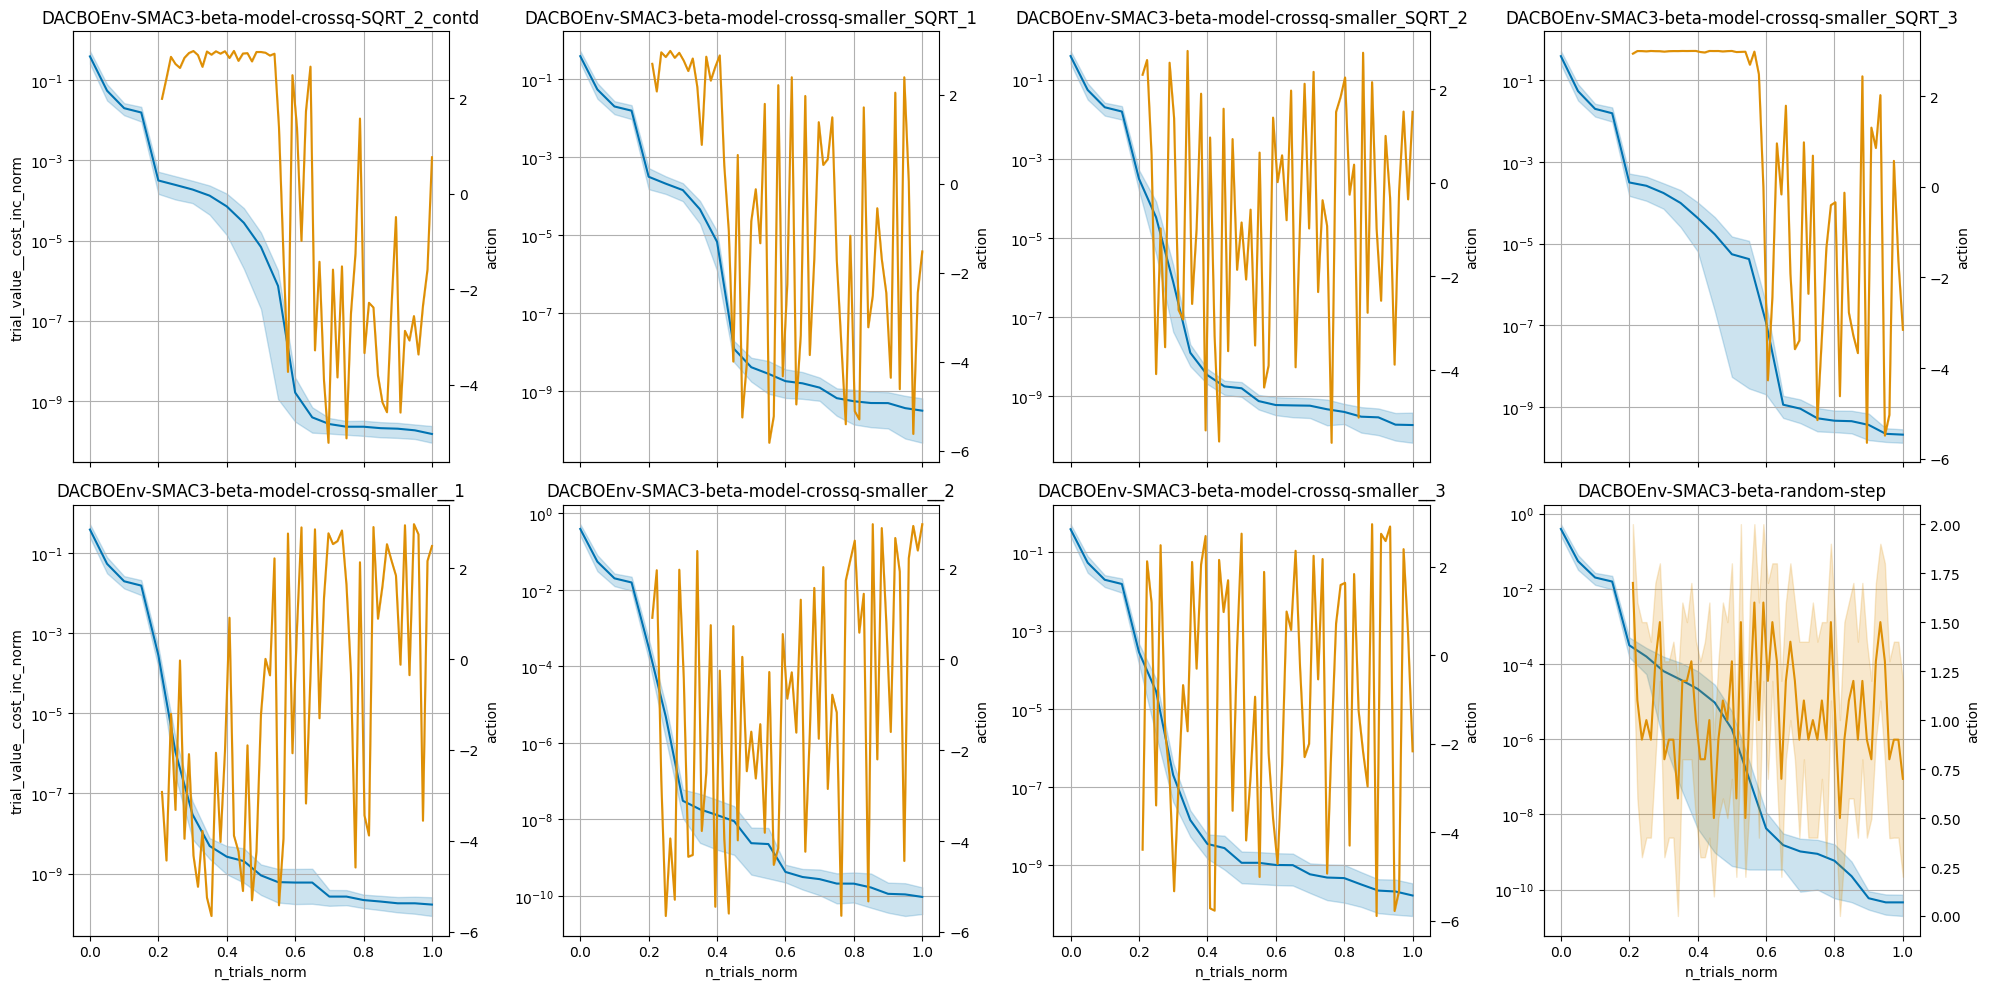

In [14]:
g = sns.relplot(
    data=df,
    kind="line",
    x="n_trials_norm",
    y="trial_value__cost_inc_norm",
    col="optimizer_id",
    color=sns.color_palette("colorblind")[0],
    facet_kws={"sharey": False, "sharex": True},
    col_wrap=4,
)

for ax, optimizer in zip(g.axes.flat, df["optimizer_id"].unique()):
    ax2 = ax.twinx()
    sns.lineplot(
        data=dacboenv_df[dacboenv_df["optimizer"] == optimizer],
        x="n_trials_norm",
        y="action",
        color=sns.color_palette("colorblind")[1],
        ax=ax2,
        legend=False
    )
    ax.set_yscale("log")
    ax.grid(True)
    ax.set_title(optimizer)

plt.tight_layout()
plt.show()